# Lab | Data Structuring and Combining Data

## Challenge 1: Combining & Cleaning Data

In this challenge, we will be working with the customer data from an insurance company, as we did in the two previous labs. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

But this time, we got new data, which can be found in the following 2 CSV files located at the links below.

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv

Note that you'll need to clean and format the new data.

Observation:
- One option is to first combine the three datasets and then apply the cleaning function to the new combined dataset
- Another option would be to read the clean file you saved in the previous lab, and just clean the two new files and concatenate the three clean datasets

In [1]:
# Your code goes here

import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
url2 = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv"
url3 = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv"

data=pd.read_csv(url)
data2=pd.read_csv(url2)
data3=pd.read_csv(url3)

new_df = pd.concat([data, data2, data3], axis=0)

new_df


,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount,State,Gender
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,NaN,NaN
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,NaN,NaN
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,NaN,NaN
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,NaN,NaN
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,NaN,NaN,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,California,M
7066,PK87824,NaN,NaN,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,California,F
7067,TD14365,NaN,NaN,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,California,M
7068,UP19263,NaN,NaN,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,California,M


In [2]:
new_df.columns = new_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [10]:
new_df.isnull().sum()

customer                      2937
st                           10007
gender                       10129
education                     2937
customer_lifetime_value       2944
income                           0
monthly_premium_auto             0
number_of_open_complaints        0
policy_type                   2937
vehicle_class                 2937
total_claim_amount               0
state                         5004
gender                        5004
dtype: int64

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12074 entries, 0 to 7069
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   9137 non-null   object 
 1   st                         2067 non-null   object 
 2   gender                     1945 non-null   object 
 3   education                  9137 non-null   object 
 4   customer_lifetime_value    9130 non-null   object 
 5   income                     12074 non-null  float64
 6   monthly_premium_auto       12074 non-null  float64
 7   number_of_open_complaints  12074 non-null  float64
 8   policy_type                9137 non-null   object 
 9   vehicle_class              9137 non-null   object 
 10  total_claim_amount         12074 non-null  float64
 11  state                      7070 non-null   object 
 12  gender                     7070 non-null   object 
dtypes: float64(4), object(9)
memory usage: 1.3+ MB


In [5]:
#Replace null values with mean on numerical columns

new_df.income.fillna(new_df.income.mean(), inplace=True)

new_df.income.isnull().sum()

new_df.monthly_premium_auto.fillna(new_df.monthly_premium_auto.mean(), inplace=True)

new_df.monthly_premium_auto.isnull().sum()

new_df.total_claim_amount.fillna(new_df.total_claim_amount.mean(), inplace=True)

new_df.total_claim_amount.isnull().sum()

new_df

,customer,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount,state,gender
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,NaN,NaN
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,NaN,NaN
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,NaN,NaN
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,NaN,NaN
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,NaN,NaN,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,California,M
7066,PK87824,NaN,NaN,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,California,F
7067,TD14365,NaN,NaN,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,California,M
7068,UP19263,NaN,NaN,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,California,M


In [6]:
#Fix the number of open complaints to take the middle value

new_df["number_of_open_complaints"] = new_df["number_of_open_complaints"].str.split("/").str[1]

#Convert the number of open complaints to numerical

new_df["number_of_open_complaints"] = pd.to_numeric(new_df["number_of_open_complaints"], errors='coerce')

new_df["number_of_open_complaints"].fillna(new_df["number_of_open_complaints"].median(), inplace=True)

new_df["number_of_open_complaints"].isnull().sum()

0

In [11]:
#Dropping duplicates

new_df_cleaned = new_df.drop_duplicates()

new_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9135 entries, 0 to 7069
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   9134 non-null   object 
 1   st                         2064 non-null   object 
 2   gender                     1942 non-null   object 
 3   education                  9134 non-null   object 
 4   customer_lifetime_value    9127 non-null   object 
 5   income                     9135 non-null   float64
 6   monthly_premium_auto       9135 non-null   float64
 7   number_of_open_complaints  9135 non-null   float64
 8   policy_type                9134 non-null   object 
 9   vehicle_class              9134 non-null   object 
 10  total_claim_amount         9135 non-null   float64
 11  state                      7070 non-null   object 
 12  gender                     7070 non-null   object 
dtypes: float64(4), object(9)
memory usage: 999.1+ KB


In [19]:
#Deleting rows with more than 3 NaN values

threshold = len(new_df_cleaned.columns) - 2

new_df_cleaned = new_df_cleaned.dropna(thresh=threshold)

In [31]:
#Filling the null values on st and gender columns with "Unknown"

new_df_cleaned["st"].fillna("Unknown", inplace=True)

new_df_cleaned['gender'] = new_df_cleaned['gender'].astype(str)

new_df_cleaned["gender"].fillna("No_info", inplace=True)

new_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9007 entries, 0 to 9006
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   9007 non-null   object 
 1   st                         9007 non-null   object 
 2   gender                     9007 non-null   object 
 3   education                  9007 non-null   object 
 4   customer_lifetime_value    9007 non-null   object 
 5   income                     9007 non-null   float64
 6   monthly_premium_auto       9007 non-null   float64
 7   number_of_open_complaints  9007 non-null   float64
 8   policy_type                9007 non-null   object 
 9   vehicle_class              9007 non-null   object 
 10  total_claim_amount         9007 non-null   float64
 11  state                      7070 non-null   object 
 12  gender                     9007 non-null   object 
dtypes: float64(4), object(9)
memory usage: 914.9+ KB

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_76075/2370227475.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_cleaned["gender"].fillna("No_info", inplace=True)


In [33]:
new_df_cleaned = new_df_cleaned.reset_index(drop=True)

new_df_cleaned 

,customer,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount,state,gender
0,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935,NaN,nan
1,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247,NaN,nan
2,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,0.0,Corporate Auto,SUV,529.881344,NaN,nan
3,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323,NaN,nan
4,OC83172,Oregon,F,Bachelor,825629.78%,62902.0,69.0,0.0,Personal Auto,Two-Door Car,159.383042,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9002,LA72316,Unknown,nan,Bachelor,23405.98798,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764,California,M
9003,PK87824,Unknown,nan,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000,California,F
9004,TD14365,Unknown,nan,Bachelor,8163.890428,0.0,85.0,0.0,Corporate Auto,Four-Door Car,790.784983,California,M
9005,UP19263,Unknown,nan,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000,California,M


# Challenge 2: Structuring Data

In this challenge, we will continue to work with customer data from an insurance company, but we will use a dataset with more columns, called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing data cleaning, formatting, and structuring.

In [44]:
# Your code goes here

url_marketing = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv"

data_marketing = pd.read_csv(url_marketing)

data_marketing

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [45]:
#Standardize header names

data_marketing.columns = data_marketing.columns.str.strip().str.lower().str.replace(' ', '_')

#Droped the column unnamed:_0 that was equal to the index

data_marketing.drop(['unnamed:_0'], axis=1, inplace=True)



In [50]:
data_marketing.duplicated().sum()

data_marketing.drop_duplicates(inplace=True)

data_marketing

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [51]:
#See the effectiveness of our campaign analysing the response rate

data_marketing["response"].value_counts()

response
No     9036
Yes    1431
Name: count, dtype: int64

We can conclude that our campaign was not effective, as only 30% of the customers responded. We will have to analyze the data to understand the characteristics of the customers who responded to our campaign.

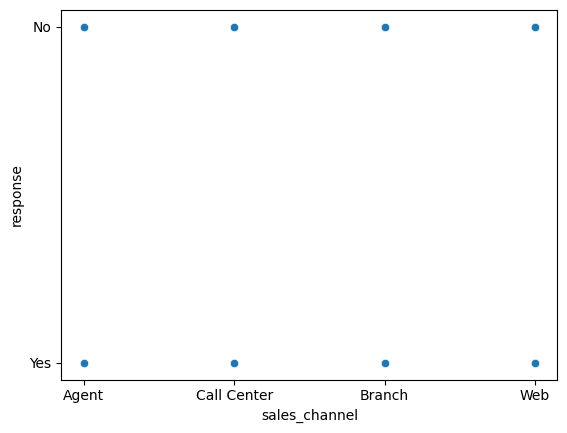

In [54]:
#To better visualize the response rate we can group by the response column, 

1. You work at the marketing department and you want to know which sales channel brought the most sales in terms of total revenue. Using pivot, create a summary table showing the total revenue for each sales channel (branch, call center, web, and mail).
Round the total revenue to 2 decimal points.  Analyze the resulting table to draw insights.

2. Create a pivot table that shows the average customer lifetime value per gender and education level. Analyze the resulting table to draw insights.

## Bonus

You work at the customer service department and you want to know which months had the highest number of complaints by policy type category. Create a summary table showing the number of complaints by policy type and month.
Show it in a long format table.

*In data analysis, a long format table is a way of structuring data in which each observation or measurement is stored in a separate row of the table. The key characteristic of a long format table is that each column represents a single variable, and each row represents a single observation of that variable.*

*More information about long and wide format tables here: https://www.statology.org/long-vs-wide-data/*

In [9]:
# Your code goes here

